# Data Cleaning Notebook

## Objectives 

* Prepare the data sets for further analysis, evaluate any missing data.

* Transform raw housing data into a structured and ready-to-model dataset.

* Handling missing values using strategies based on data types and distributions.


## Inputs

* outputs/datasets/collection/house_prices_records.csv
* outputs/datasets/collection/inherited_houses.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned.
   
* Clean and consistent dataset for building a reliable predictive model.


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Sales-House-Price-Estimate/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Sales-House-Price-Estimate'

---

## Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

# Load main data
df = pd.read_csv(f"outputs/datasets/collection/house_prices_records.csv")
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000
5,796,566.0,1.0,No,732,GLQ,64,NaN,480,Unf,...,85.0,0.0,30,5,5,796,NaN,1993,1995,143000
6,1694,0.0,3.0,Av,1369,GLQ,317,NaN,636,RFn,...,75.0,186.0,57,5,8,1686,NaN,2004,2005,307000
7,1107,983.0,3.0,Mn,859,ALQ,216,NaN,484,NaN,...,NaN,240.0,204,6,7,1107,NaN,1973,1973,200000
8,1022,752.0,2.0,No,0,Unf,952,NaN,468,Unf,...,51.0,0.0,0,5,7,952,NaN,1931,1950,129900
9,1077,0.0,2.0,No,851,GLQ,140,NaN,205,RFn,...,50.0,0.0,4,6,5,991,NaN,1939,1950,118000


---

## Data Exploration

Evaluate Missing Data

               Rows With Missing Data  PercentageOfDataset Data Type
EnclosedPorch                    1324                90.68   float64
WoodDeckSF                       1305                89.38   float64
LotFrontage                       259                17.74   float64
GarageFinish                      235                16.10    object
BsmtFinType1                      145                 9.93    object
BedroomAbvGr                       99                 6.78   float64
2ndFlrSF                           86                 5.89   float64
GarageYrBlt                        81                 5.55   float64
BsmtExposure                       38                 2.60    object
MasVnrArea                          8                 0.55   float64


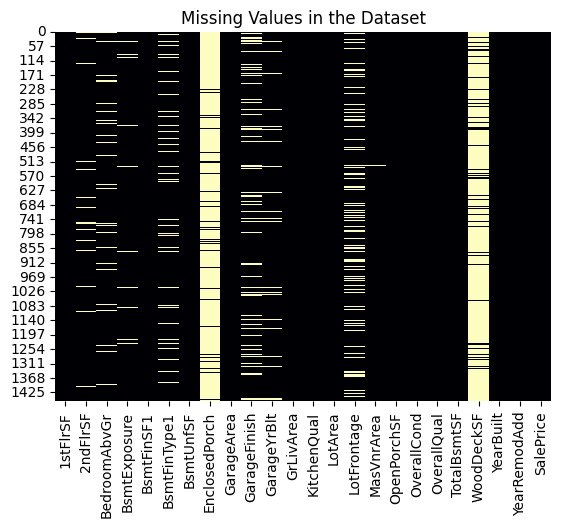

In [6]:
def evaluate_missing_data(df):
    missing_abs = df.isnull().sum()
    missing_pct = round(missing_abs / len(df) * 100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"Rows With Missing Data": missing_abs,
                                "PercentageOfDataset": missing_pct,
                                "Data Type": df.dtypes
                                }
                                    )
                        .sort_values(by=['PercentageOfDataset'], ascending=False)
                        .query("PercentageOfDataset > 0")
                        )

    return df_missing_data
evaluate_missing_data(df)
print(evaluate_missing_data(df))

# Heatmap to display missing data levels
sns.heatmap(df.isnull(), cmap='magma', cbar=False)
plt.title("Missing Values in the Dataset")
plt.show()

## Correlation and PPS Analysis

We previously visualised correlation using Pearson method. Now we will visualise Spearman, Pearson correlation and PPS- Power Predictive Score.

In [7]:
# Custom made function taken from Churnometer walktrough project
def heatmap_corr(df, threshold, figsize=(10, 8), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='mako', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(10, 8), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                        mask=mask, cmap='rocket', annot_kws={"size": font_annot},
                        linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    import warnings

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning) # Ignore FutureWarning for ppscore to improve readability
        pps_matrix_raw = pps.matrix(df)
        pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

        pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
        print("\nPPS threshold - check PPS score IQR to decide threshold for heatmap \n")
        print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                    figsize=(10, 8), font_annot=8):

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

Calculate Correlations and Power Predictive Score

In [8]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

/home/cistudent/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/home/cistudent/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(



PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%   75%    max
ppscore  552.0  0.055  0.104  0.0  0.0  0.0  0.06  0.702


#### Display Heatmaps



*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



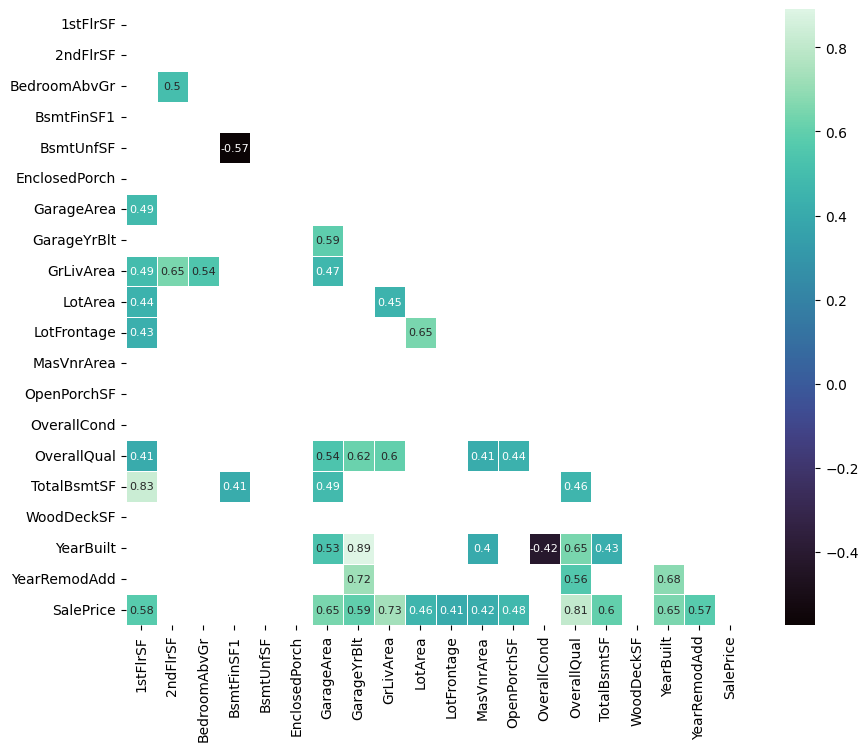



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



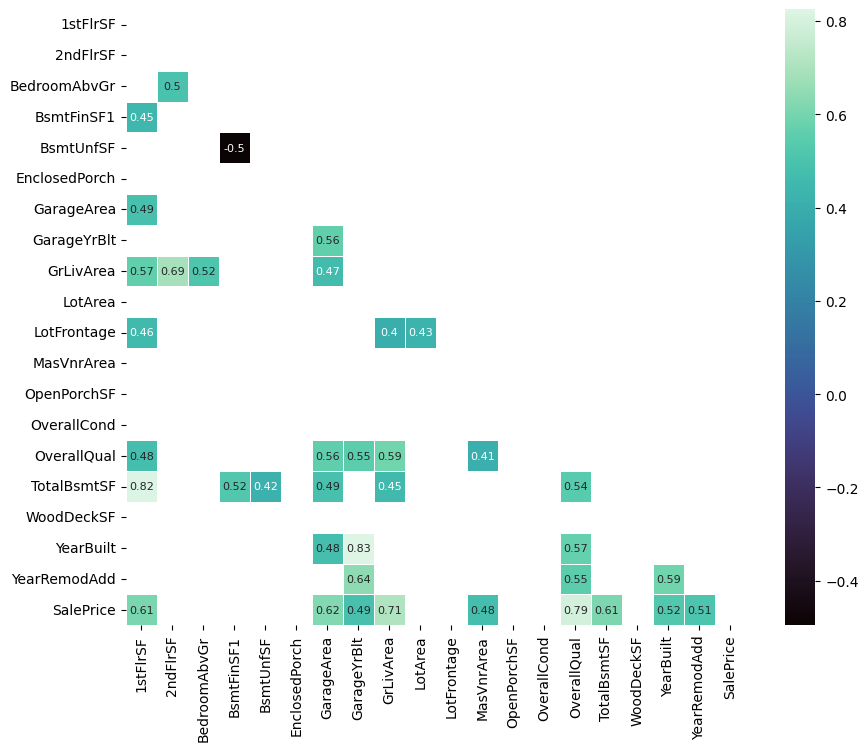



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



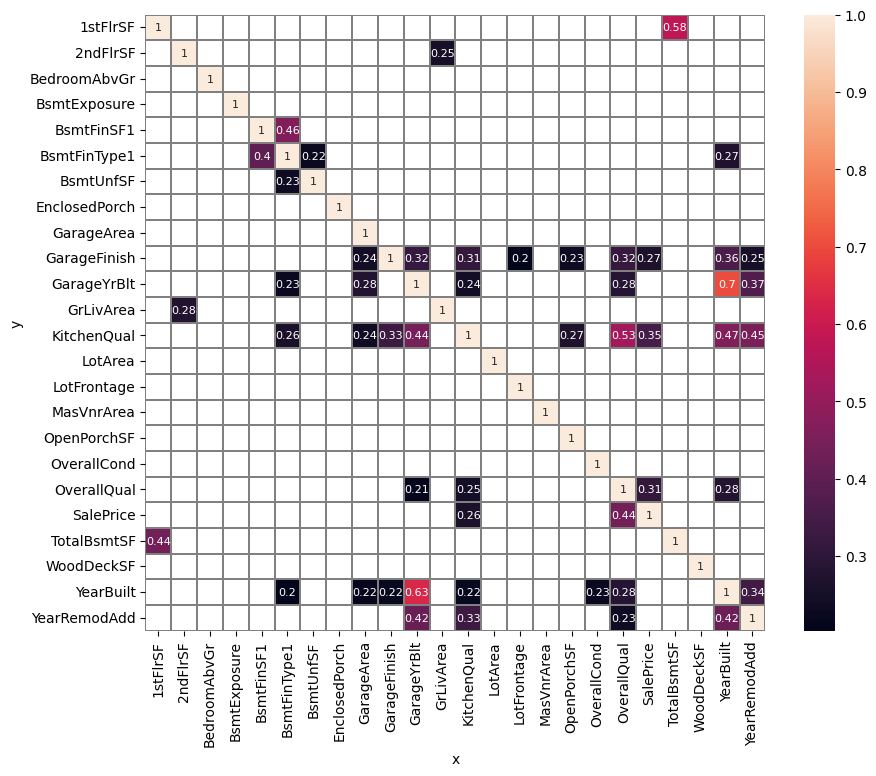

In [9]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                df_corr_spearman = df_corr_spearman, 
                pps_matrix = pps_matrix,
                CorrThreshold = 0.4, PPS_Threshold =0.2,
                figsize=(10,8), font_annot=8)

* Since 50% of all PPS are 0, it indicates that the majority of variable-to-variable relationships lack predictive power.

* Just 25% of interactions have a PPS above 0.06, with 75% falling below this threshold.

* Only a few values go above 0.2, so by setting the threshold at 0.2, we're displaying just the top 5 to 10 percent of predictive connections, highlighting strong signals.

* It follows IQR logic (75% of scores are below 0.06, hence 0.2 is in the upper tail).

**Multicollinearity Considerations**

We find that the variables in every heatmap have predictive potential and are associated with each other.  They therefore offer redundant data for the sake of forecasting the target variable, raising the possibility that the model would overfit.  The next notebook will contain a step to remove any features that are excessively connected in order to fix this.

## Data Cleaning

### Handle missing data

Missing data must be addressed before any modeling or transformation may take place.  In addition to preventing irregularities during encoding and scaling, this guarantees model compatibility.

This includes:

* 2 of the variables have over 80% missing values, so we can drop them from our Dataset.

* Part of numerical columns will be filled with median and remaining with 0 to reduce outlier influence.

* Categorical columns will be filled with None.

In [10]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Split Train and Test Set

We split the dataset before cleaning to avoid data leakage.

This ensures that:

- The test set continues to be a realistic "unseen" sample, to assess model performance.
  
- We simulate what would happen in a real-world deployment, where new data is cleaned using a process built on the training set.

In [11]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


In [12]:
from sklearn.pipeline import Pipeline 
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.selection import DropFeatures
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# DataFrame to handle missing data
vars_to_drop = ['EnclosedPorch','WoodDeckSF'] # variables to drop
vars_median = ['BedroomAbvGr', 'LotFrontage'] # numerical variables to fill missing data with median
vars_zero = ['2ndFlrSF', 'MasVnrArea', 'GarageYrBlt'] # numerical variables to fill missing data with zero
vars_cat = ['GarageFinish', 'BsmtFinType1', 'BsmtExposure'] # categorical variables to fill missing data with None

pipeline = Pipeline([
    ('drop', DropFeatures(features_to_drop=vars_to_drop)),
    ('median', MeanMedianImputer(imputation_method='median', variables=vars_median)),
    ('zero', ArbitraryNumberImputer(arbitrary_number=0, variables=vars_zero)),
    ('cat', CategoricalImputer(imputation_method='missing', fill_value="None", variables=vars_cat))
])

df_clean = pipeline.fit_transform(TrainSet)

Check to confirm there is no missing data in the new DataFrame.

In [13]:
df_clean.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

Using a custom function, we assess the effect on the variable's distribution.

In [14]:
# Cutom made function, delivered in the Code Institute course *credits
def DataCleaningEffect(df_original,df_clean,variables_applied_with_method):

  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_original.select_dtypes(exclude=['number']).columns 

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    
    print("\n")
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type": "Original", "Value": df_original[var].astype(str)})
        df2 = pd.DataFrame({"Type": "Cleaned", "Value": df_clean[var].astype(str)})

        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_clean, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1

We put together variables handled earlier.

In [15]:
variables_applied_with_method = vars_median + vars_zero + vars_cat
print(variables_applied_with_method)

['BedroomAbvGr', 'LotFrontage', '2ndFlrSF', 'MasVnrArea', 'GarageYrBlt', 'GarageFinish', 'BsmtFinType1', 'BsmtExposure']





* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BedroomAbvGr', 'LotFrontage', '2ndFlrSF', 'MasVnrArea', 'GarageYrBlt', 'GarageFinish', 'BsmtFinType1', 'BsmtExposure'] 




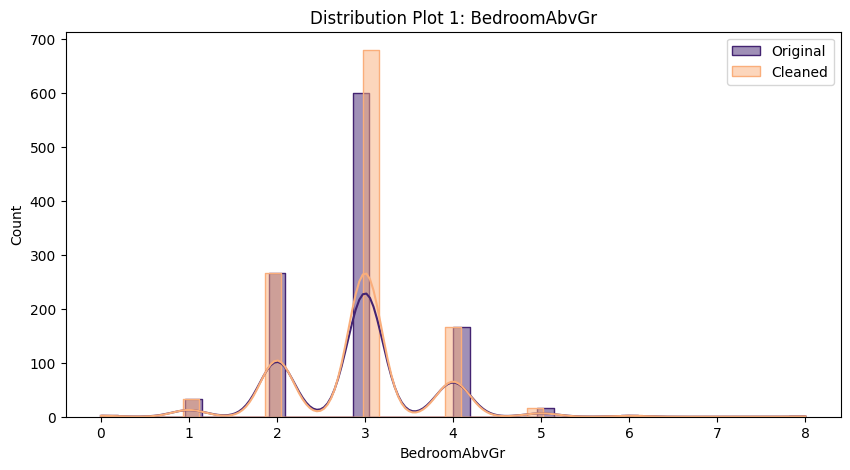

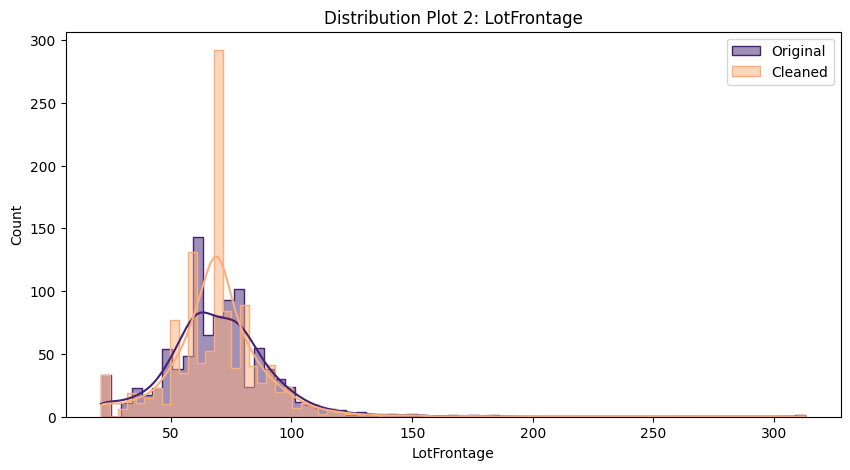

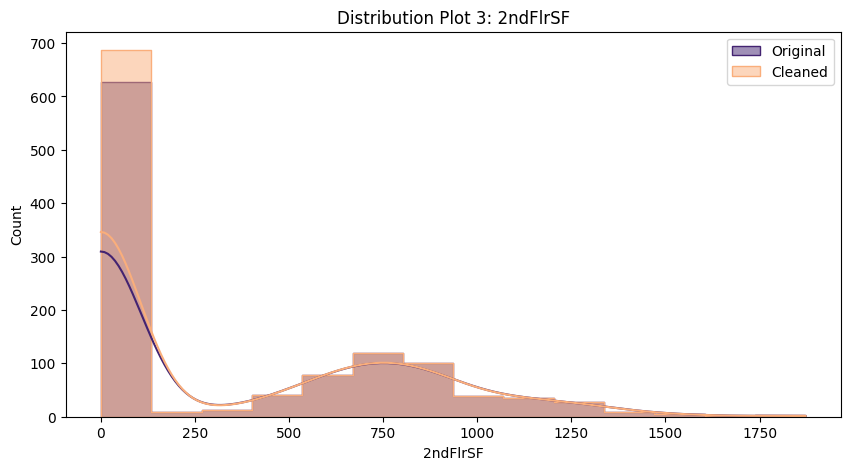

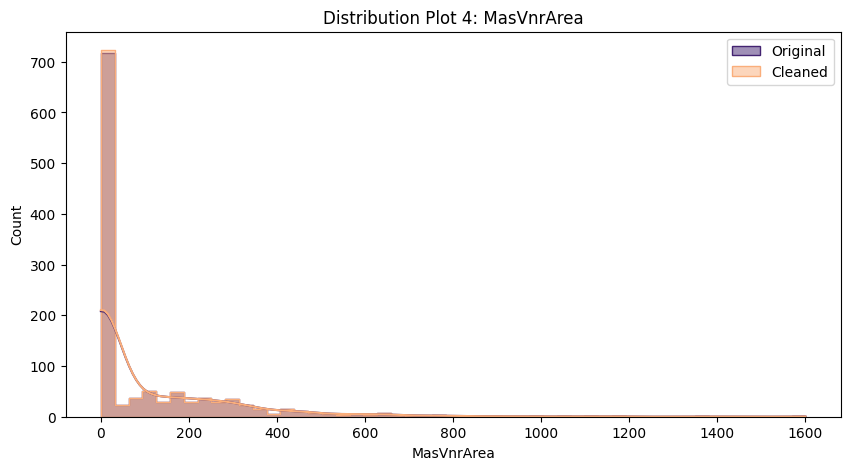

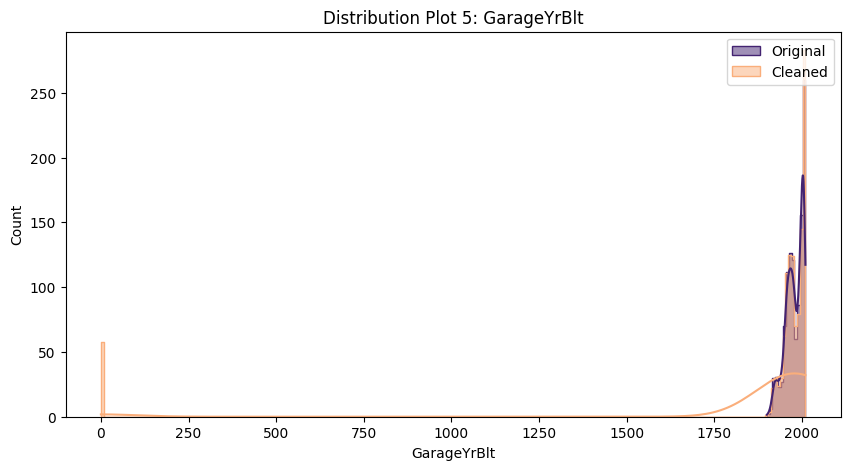

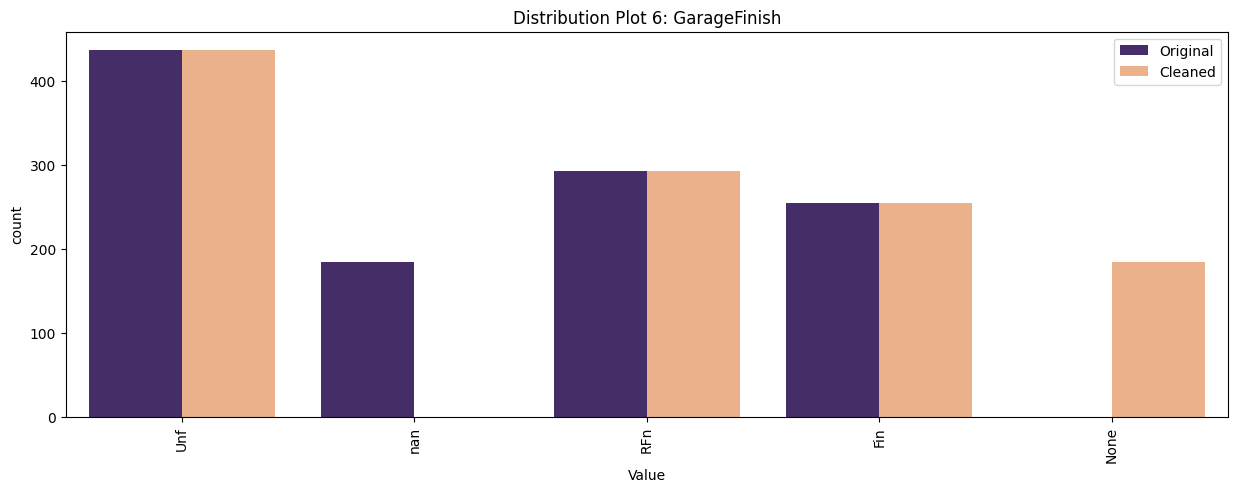

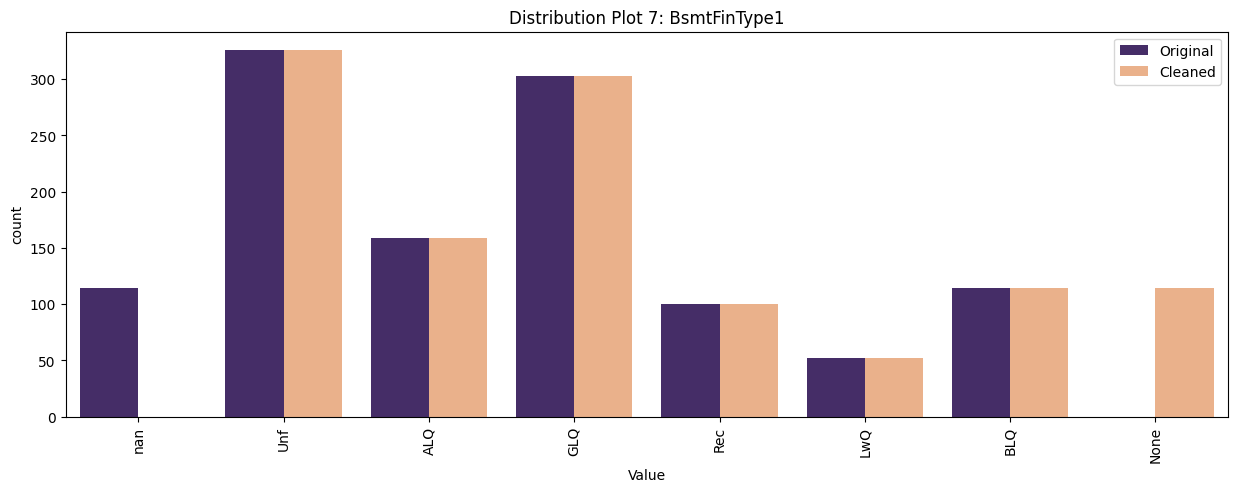

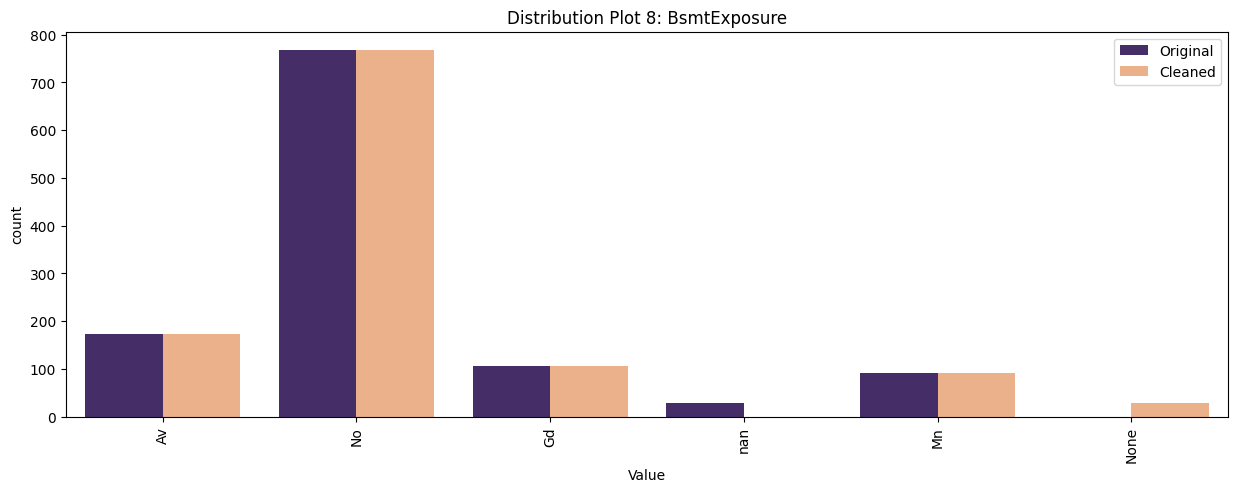

In [16]:
DataCleaningEffect(df_original=TrainSet, df_clean=df_clean, variables_applied_with_method=variables_applied_with_method)

### Post-Imputation Correlation & PPS Check

Now that we've imputed missing values, we reassess the variables relationships.

This helps us:

* Re-confirm top predictors of SalePrice

* Detect any new multicollinearity

We will examine both:

* Pearson/Spearman correlation (for linear and monotonic relationships)

* Power Predictive Score (PPS) (for general predictive strength)

In [17]:
warnings.simplefilter(action='ignore', category=UserWarning) # Ignore FutureWarning for ppscore to improve readability

print("\nOriginal Dataset")
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

print("\n--------------------------------------------------------------------------")
print("\nCleaned Dataset")
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_clean)


Original Dataset

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%   75%    max
ppscore  552.0  0.055  0.104  0.0  0.0  0.0  0.06  0.702

--------------------------------------------------------------------------

Cleaned Dataset

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%   75%    max
ppscore  462.0  0.055  0.107  0.0  0.0  0.0  0.06  0.873


* **The number of evaluated variable pairs decreased after cleaning and imputing missing values, because sparse columns were eliminated.**

* **Remarkably, the maximum PPS went from 0.702 to 0.873, indicating that once missing values were filled in, several variable correlations grew noticeably stronger. This implies that previously hidden predictive signals were made visible by the cleaning process.**

#### Display Heatmaps



*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



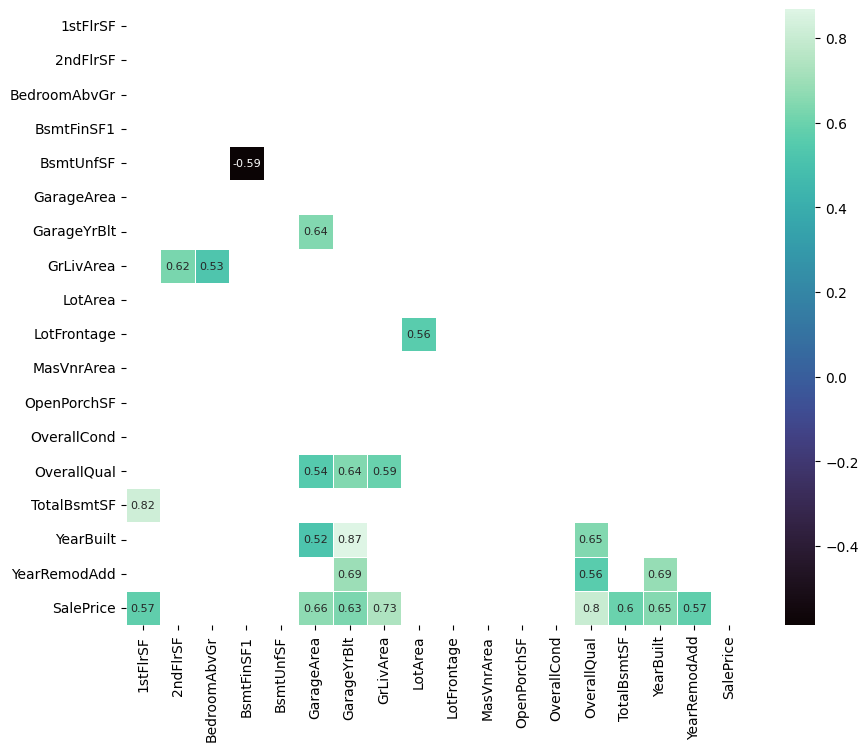



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



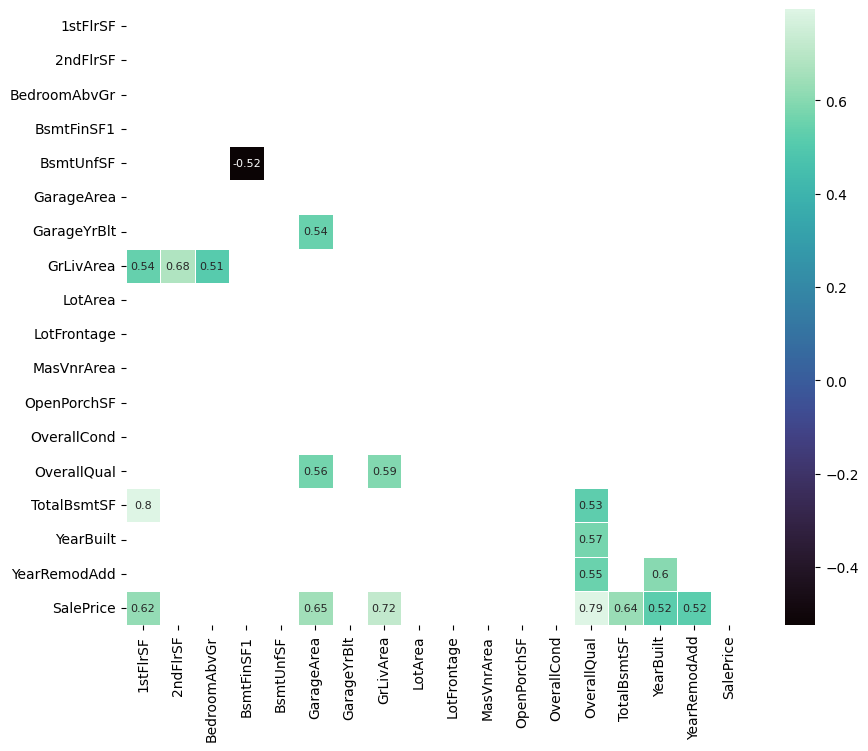



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



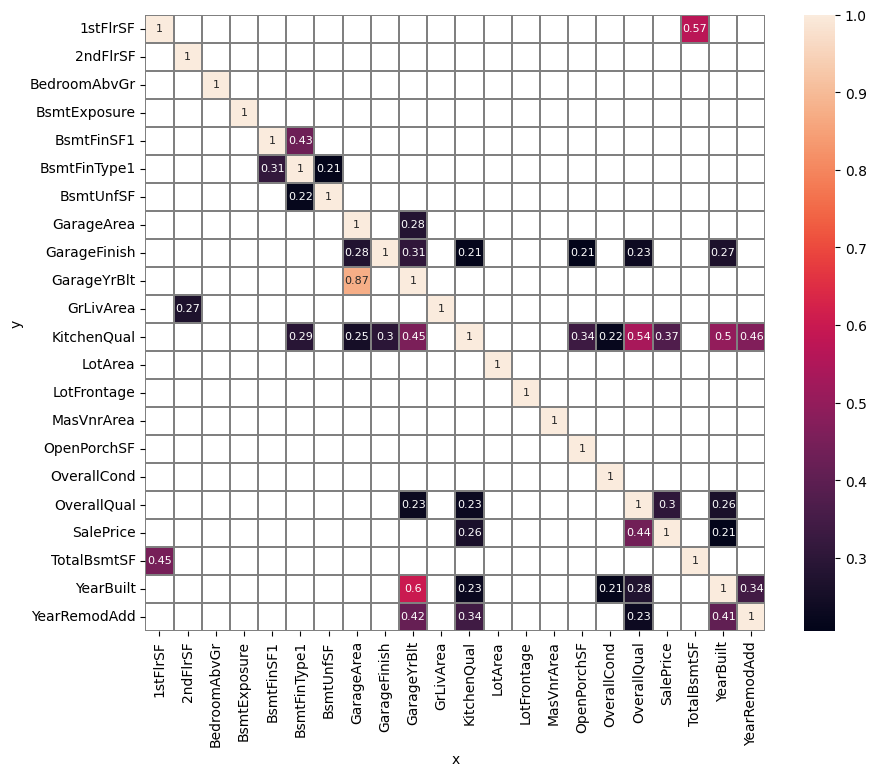

In [18]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.5, PPS_Threshold = 0.2,
                  figsize=(10,8), font_annot=8)

After imputing missing values and removing sparse variables, the correlation patterns shifted slightly. Spearman and Pearson scores remained largely stable for core predictive variables, but Power Predictive Score (PPS) revealed stronger signals in some imputed variables.

---

#### Load inherited Data

In [19]:
# Load inherited houses data
df_inherited = pd.read_csv(f"outputs/datasets/collection/inherited_houses.csv")
df_inherited.info()
df_inherited

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       4 non-null      int64  
 1   2ndFlrSF       4 non-null      int64  
 2   BedroomAbvGr   4 non-null      int64  
 3   BsmtExposure   4 non-null      object 
 4   BsmtFinSF1     4 non-null      float64
 5   BsmtFinType1   4 non-null      object 
 6   BsmtUnfSF      4 non-null      float64
 7   EnclosedPorch  4 non-null      int64  
 8   GarageArea     4 non-null      float64
 9   GarageFinish   4 non-null      object 
 10  GarageYrBlt    4 non-null      float64
 11  GrLivArea      4 non-null      int64  
 12  KitchenQual    4 non-null      object 
 13  LotArea        4 non-null      int64  
 14  LotFrontage    4 non-null      float64
 15  MasVnrArea     4 non-null      float64
 16  OpenPorchSF    4 non-null      int64  
 17  OverallCond    4 non-null      int64  
 18  OverallQual   

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


On exploring both data sets we notice not all numerical variables are the same type, so we will float data type into integer on both DataFrames.

In [21]:
# Transform house dataset
for col in df_clean.select_dtypes('float').columns:
    df_clean[col] = df_clean[col].astype('int64')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 618 to 684
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   1stFlrSF      1168 non-null   int64 
 1   2ndFlrSF      1168 non-null   int64 
 2   BedroomAbvGr  1168 non-null   int64 
 3   BsmtExposure  1168 non-null   object
 4   BsmtFinSF1    1168 non-null   int64 
 5   BsmtFinType1  1168 non-null   object
 6   BsmtUnfSF     1168 non-null   int64 
 7   GarageArea    1168 non-null   int64 
 8   GarageFinish  1168 non-null   object
 9   GarageYrBlt   1168 non-null   int64 
 10  GrLivArea     1168 non-null   int64 
 11  KitchenQual   1168 non-null   object
 12  LotArea       1168 non-null   int64 
 13  LotFrontage   1168 non-null   int64 
 14  MasVnrArea    1168 non-null   int64 
 15  OpenPorchSF   1168 non-null   int64 
 16  OverallCond   1168 non-null   int64 
 17  OverallQual   1168 non-null   int64 
 18  TotalBsmtSF   1168 non-null   int64 
 19  YearBuilt 

In [22]:
# Transform inherited dataset
for col in df_inherited.select_dtypes('float').columns:
    df_inherited[col] = df_inherited[col].astype('int64')

df_inherited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   1stFlrSF       4 non-null      int64 
 1   2ndFlrSF       4 non-null      int64 
 2   BedroomAbvGr   4 non-null      int64 
 3   BsmtExposure   4 non-null      object
 4   BsmtFinSF1     4 non-null      int64 
 5   BsmtFinType1   4 non-null      object
 6   BsmtUnfSF      4 non-null      int64 
 7   EnclosedPorch  4 non-null      int64 
 8   GarageArea     4 non-null      int64 
 9   GarageFinish   4 non-null      object
 10  GarageYrBlt    4 non-null      int64 
 11  GrLivArea      4 non-null      int64 
 12  KitchenQual    4 non-null      object
 13  LotArea        4 non-null      int64 
 14  LotFrontage    4 non-null      int64 
 15  MasVnrArea     4 non-null      int64 
 16  OpenPorchSF    4 non-null      int64 
 17  OverallCond    4 non-null      int64 
 18  OverallQual    4 non-null      int

**Drop features in TestSet before saving the dataset.**

In [24]:
TrainSet, TestSet = pipeline.transform(TrainSet) , pipeline.transform(TestSet)

In [28]:
for col in TrainSet.select_dtypes('float').columns:
    TrainSet[col] = TrainSet[col].astype('int64')

for col in TestSet.select_dtypes('float').columns:
    TestSet[col] = TestSet[col].astype('int64')

---

## Push cleaned files to Repo

We can now save our TrainSet, TestSet and Clean Inherited Data.

In [30]:
import os

try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

df_clean.to_csv("outputs/datasets/cleaned/clean_house_price_records.csv", index=False) # save entire cleaned house price dataset
df_inherited.to_csv("outputs/datasets/cleaned/clean_inherited_houses.csv", index=False) # save cleaned inherited houses dataset
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False) # save cleaned Test Set 
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False) # save cleaned Train Set

[Errno 17] File exists: 'outputs/datasets/cleaned'


## Conclusion and Next Steps

In this notebook we:

* Identified variables with missing data and evaluated their type and proportion.

* Dropped ```EnclosedPorch``` and ```WoodDeckSF``` due to sparsity and low predictive potential.

* Split dataset into training and testing subsets before applying any modeling logic.

* Transformed numerical variables in both datasets from float to integer.

* Saved cleaned datasets for reuse in the upcoming modelling notebook.

Next Steps:

* Encode categorical features.

* Perform Feature Engineering for model training.